# Ejercicios Evaluables

## Master Universitario en Inteligencia Artificial
## 02MIAR-Matematicas para la inteligencia artificial

Nombre: Luis Enrique Sánchez Zamora

repo: https://github.com/sanieni6/02MIAR-Matematicas-para-ai

1. Tal y como ya hemos visto en clase, la variedad de herramientas proporcionadas por el
´algebra lineal son cruciales para desarrollar y fundamentar las bases de una variedad de
t´ecnicas relacionadas con el aprendizaje autom´atico. Con ella, podemos describir el proceso
de propagaci´on hacia adelante en una red neuronal, identificar m´ınimos locales en funciones
multivariables (crucial para el proceso de retropropagaci´on) o la descripci´on y empleo de
m´etodos de reducci´on de la dimensionalidad, como el an´alisis de componentes principales
(PCA), entre muchas otras aplicaciones.
Cuando trabajamos en la pr´actica dentro de este ´ambito, la cantidad de datos que manejamos
puede ser muy grande, por lo que es especialmente importante emplear algoritmos eficientes
y optimizados para reducir el coste computacional en la medida de lo posible. Por todo ello,
el objetivo de este ejercicio es el de ilustrar las diferentes alternativas que pueden existir
para realizar un proceso relacionado con el ´algebra lineal y el impacto que puede tener cada
variante en t´erminos del coste computacional del mismo. En este caso en particular, y a modo
de ilustraci´on, nos centraremos en el c´alculo del determinante de una matriz.

a) [1 punto] Implementa una funci´on, determinante recursivo, que obtenga el deter-
minante de una matriz cuadrada utilizando la definici´on recursiva de Laplace.

In [4]:
import numpy as np

In [3]:
def determinante_recursivo(matrix):
    n = len(matrix)

    if n == 1:
        return matrix[0][0]  # Caso base
    if n == 2:
        return matrix[0][0]*matrix[1][1] - matrix[0][1]*matrix[1][0]  # Caso 2x2

    det = 0
    for c in range(n):
        submatrix = [row[:c] + row[c+1:] for row in matrix[1:]]  # Eliminar fila 0 y columna c
        sign = (-1) ** c  # Signo alternante
        det += sign * matrix[0][c] * determinante_recursivo(submatrix)  # Definición de Laplace
    return det

print( 'Determinante recursivo: ', determinante_recursivo([[1, 3, 3], [4, 5, 6], [7, 8, 9]]))

Determinante recursivo:  6


b) [0.5 puntos] Si A es una matriz cuadrada n×n y triangular (superior o inferior, es decir,
con entradas nulas por debajo o por encima de la diagonal, respectivamente), ¿existe
alguna forma de calcular de forma directa y sencilla su determinante? Justif´ıquese la
respuesta.

Si una matriz cuadrada es triangular (superior o inferior), su determinante es el producto de los elementos de la diagonal principal.

$$
A = \begin{bmatrix}
2 & 3 & 1 \\
0 & 5 & 4 \\
0 & 0 & 7
\end{bmatrix}
\Rightarrow \text{det}(A) = 2 \cdot 5 \cdot 7 = 70
$$

In [5]:
A = np.array([
    [2, 3, 1],
    [0, 5, 4],
    [0, 0, 7]
])
print(np.prod(np.diag(A)))  # Producto de la diagonal

70


## c) [0.5 puntos] Determínese de forma justificada cómo alteran el determinante de una
matriz n×n las dos operaciones elementales siguientes:

### Intercambiar una fila (o columna) por otra fila (o columna).

cambia el signo del determinante.

Sea la matriz original:
$$
A =
\begin{bmatrix}
1 & 2 & 3 \\
0 & 4 & 5 \\
1 & 0 & 6
\end{bmatrix}
$$
El determinante de A es:
$$
\text{det}(A) = 1 \cdot (4 \cdot 6 - 5 \cdot 0) - 2 \cdot (0 \cdot 6 - 5 \cdot 1) + 3 \cdot (0 \cdot 0 - 4 \cdot 1) = 24 + 10 - 12 = 22
$$

1. Intercambio de dos filas (F1 ⟷ F3):
$$
A’ =
\begin{bmatrix}
1 & 0 & 6 \\
0 & 4 & 5 \\
1 & 2 & 3
\end{bmatrix}
\Rightarrow \text{det}(A’) = -\text{det}(A) = -22
$$

✅ Cambiar dos filas invierte el signo del determinante.

### Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar α.
(F3 ← F3 + 2×F1)

$$
A’’ =
\begin{bmatrix}
1 & 2 & 3 \\
0 & 4 & 5 \\
1 + 2\cdot1 & 0 + 2\cdot2 & 6 + 2\cdot3
\end{bmatrix}

\begin{bmatrix}
1 & 2 & 3 \\
0 & 4 & 5 \\
3 & 4 & 12
\end{bmatrix}
$$

$$
\text{det}(A’’) = \text{det}(A) = 22
$$

✅ Sumar una fila escalada a otra no cambia el determinante.

## d ) [1 punto] Investiga sobre el método de eliminación de Gauss con pivoteo parcial e impleméntalo para escalonar una matriz (es decir, convertirla en una matriz triangular inferior) a partir de las operaciones elementales descritas en el apartado anterior. 

In [7]:
def gauss_pivoteo(A):
    # Convertir a array de NumPy primero
    A = np.array(A, dtype=float)
    n = len(A)

    for i in range(n):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(A[i:, i])) + i
        if i != max_row:
            A[[i, max_row]] = A[[max_row, i]]

        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
    return A

print(gauss_pivoteo([[1, 3, 3], [4, 5, 6], [7, 8, 9]]))

[[7.         8.         9.        ]
 [0.         1.85714286 1.71428571]
 [0.         0.         0.46153846]]


## e) [0.5 puntos] ¿Cómo se podría calcular el determinante de una matriz haciendo beneficio de la estrategia anterior y del efecto de aplicar las operaciones elementales pertinentes? Implementa una nueva función, determinante gauss, que calcule el determinante de una matriz utilizando eliminación gaussiana.


In [10]:
def determinante_gauss(A):
    # Convertir a array de NumPy primero
    A = np.array(A, dtype=float)
    n = len(A)
    sign = 1

    for i in range(n):
        max_row = np.argmax(np.abs(A[i:, i])) + i
        if i != max_row:
            A[[i, max_row]] = A[[max_row, i]]
            sign *= -1

        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]

    return sign * np.prod(np.diag(A))

print(determinante_gauss([[1, 3, 3], [4, 5, 6], [7, 8, 9]]))

# usemos los metodos anteriores para comprobar que el resultado es el mismo
print(determinante_recursivo([[1, 3, 3], [4, 5, 6], [7, 8, 9]]))
print(determinante_gauss([[1, 3, 3], [4, 5, 6], [7, 8, 9]]))

6.0000000000000036
6
6.0000000000000036


## f ) [0.5 puntos] Obtén la complejidad computacional asociada al cálculo del determinante con la definición recursiva y con el método de eliminación de Gauss con pivoteo parcial.

### 1. Complejidad del determinante recursivo (Laplace)

La definición de Laplace se basa en una expansión recursiva: para calcular el determinante de una matriz de tamaño $n \times n$, se necesita calcular $n$ determinantes de tamaño $(n-1) \times (n-1)$, y así sucesivamente.

Esto genera un árbol de llamadas recursivas que crece exponencialmente.

- Número de operaciones

El número de llamadas recursivas sigue aproximadamente el patrón:

$$
T(n) = n \cdot T(n-1)
\Rightarrow T(n) = n!
$$

- Complejidad temporal

$$
\boxed{\mathcal{O}(n!)}
$$

### 2. Complejidad del método de eliminación de Gauss con pivoteo parcial

La eliminación de Gauss realiza:
- $n-1$ pasos de eliminación,
- y en cada paso se realizan hasta $(n-i) \cdot (n-i)$ operaciones (bucle doble sobre submatriz).

El número total de operaciones es aproximadamente:

$$
\sum_{k=1}^{n} k^2 \in \mathcal{O}(n^3)
$$

- Complejidad temporal

$$
\boxed{\mathcal{O}(n^3)}
$$

## g ) [1 punto] Utilizando numpy.random.rand, genera matrices cuadradas aleatorias de la forma $A_n \in \mathbb{R}^{n \times n}$, para $2 \leq n \leq 10$, y confecciona una tabla comparativa del tiempo de ejecución asociado a cada una de las variantes siguientes, interpretando los resultados:
- Utilizando determinante recursivo.
- Empleando determinante gauss.
- Haciendo uso de la funci´on preprogramada numpy.linalg.det.


,n,Recursivo,Gauss,NumPy
0,2,0.000003,0.000041,0.000013
1,3,0.000004,0.000013,0.000004
2,4,0.000009,0.000013,0.000003
3,5,0.000036,0.000031,0.000003
4,6,0.000201,0.000026,0.000002
5,7,NaN,0.000035,0.000003
6,8,NaN,0.000043,0.000003
7,9,NaN,0.000050,0.000002
8,10,NaN,0.000055,0.000003


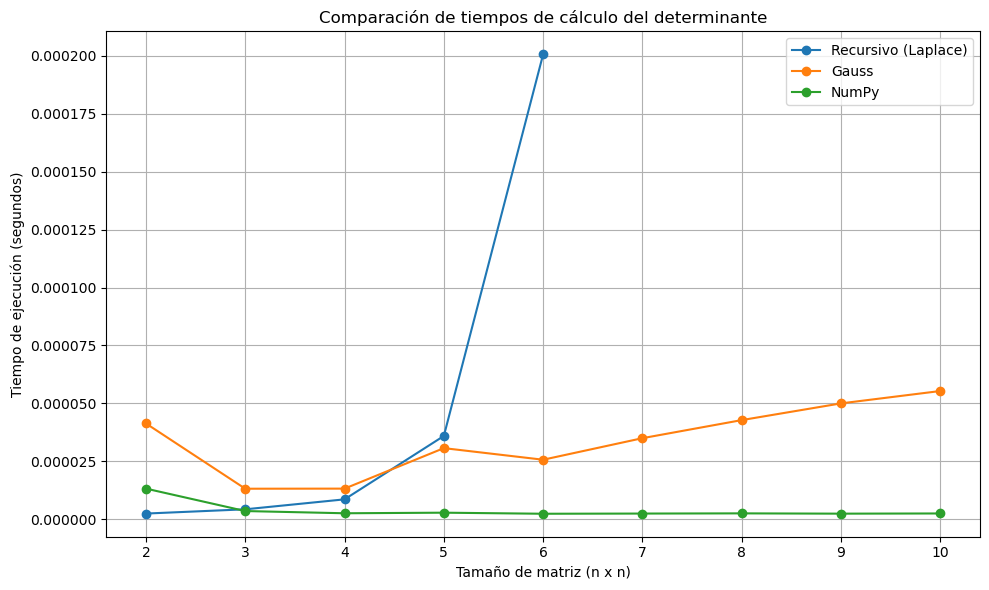

In [12]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

# ---------- Comparación de tiempos ----------
sizes = list(range(2, 11))  # Matrices de 2x2 a 10x10
resultados = []

for n in sizes:
    A = np.random.rand(n, n)
    fila = {"n": n}

    # Método recursivo (solo hasta n = 6)
    if n <= 6:
        start = time.perf_counter()
        _ = determinante_recursivo(A.tolist())
        fila["Recursivo"] = time.perf_counter() - start
    else:
        fila["Recursivo"] = None

    # Método de Gauss
    start = time.perf_counter()
    _ = determinante_gauss(A)
    fila["Gauss"] = time.perf_counter() - start

    # Método NumPy
    start = time.perf_counter()
    _ = np.linalg.det(A)
    fila["NumPy"] = time.perf_counter() - start

    resultados.append(fila)

# Crear DataFrame
df_tiempos = pd.DataFrame(resultados)
display(df_tiempos)

# ---------- Gráfico comparativo ----------

plt.figure(figsize=(10, 6))
plt.plot(df_tiempos["n"], df_tiempos["Recursivo"], marker='o', label="Recursivo (Laplace)")
plt.plot(df_tiempos["n"], df_tiempos["Gauss"], marker='o', label="Gauss")
plt.plot(df_tiempos["n"], df_tiempos["NumPy"], marker='o', label="NumPy")
plt.xlabel("Tamaño de matriz (n x n)")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Comparación de tiempos de cálculo del determinante")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()